In [51]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.lines import Line2D

import plotly.express as px
import plotly.express as px




### Information about annotated Real News spreader web sources

rn_anno

In [52]:
rn_anno = pd.read_csv(r'domain_annotations/rn_domains_annotated',sep=';',header=None,names=['Source','Bias','Factuality'])

In [53]:
rn_anno.describe()

,Source,Bias,Factuality
count,577,547,551
unique,560,5,4
top,reuters.com,LEAST_BIASED,HIGH
freq,2,459,457


In [54]:
rn_anno.head()

,Source,Bias,Factuality
0,kiplinger.com,LEAST_BIASED,HIGH
1,limacharlienews.com,LEAST_BIASED,HIGH
2,cincinnati.com,LEAST_BIASED,HIGH
3,snopes.com,LEFT_CENTER,HIGH
4,greenvilleonline.com,LEAST_BIASED,HIGH


In [55]:
rn_anno['Bias'].unique()

array(['LEAST_BIASED', 'LEFT_CENTER', nan, 'RIGHT_CENTER', 'PRO_SCIENCE',
       'LEAST_BIASED, PRO_SCIENCE'], dtype=object)

In [56]:
rn_anno.dropna(inplace=True)
rn_anno['Bias'].unique()

array(['LEAST_BIASED', 'LEFT_CENTER', 'RIGHT_CENTER', 'PRO_SCIENCE',
       'LEAST_BIASED, PRO_SCIENCE'], dtype=object)

In [57]:
rn_anno_edit = rn_anno.copy(deep=True)
rn_anno_edit.head()

,Source,Bias,Factuality
0,kiplinger.com,LEAST_BIASED,HIGH
1,limacharlienews.com,LEAST_BIASED,HIGH
2,cincinnati.com,LEAST_BIASED,HIGH
3,snopes.com,LEFT_CENTER,HIGH
4,greenvilleonline.com,LEAST_BIASED,HIGH


In [58]:
rn_anno_edit['Bias'] = rn_anno_edit['Bias'].apply(lambda x: str(x).split(','))

# Get list of unique categories
categories = set(x.strip() for l in rn_anno_edit['Bias'] for x in l)

# Create new binary columns for each category
for cat in categories:
    rn_anno_edit[cat] = rn_anno_edit['Bias'].apply(lambda x: int(cat in x))
    
    
categories

{'LEAST_BIASED', 'LEFT_CENTER', 'PRO_SCIENCE', 'RIGHT_CENTER'}

In [59]:
rn_anno_edit.head()

,Source,Bias,Factuality,LEAST_BIASED,LEFT_CENTER,RIGHT_CENTER,PRO_SCIENCE
0,kiplinger.com,[LEAST_BIASED],HIGH,1,0,0,0
1,limacharlienews.com,[LEAST_BIASED],HIGH,1,0,0,0
2,cincinnati.com,[LEAST_BIASED],HIGH,1,0,0,0
3,snopes.com,[LEFT_CENTER],HIGH,0,1,0,0
4,greenvilleonline.com,[LEAST_BIASED],HIGH,1,0,0,0


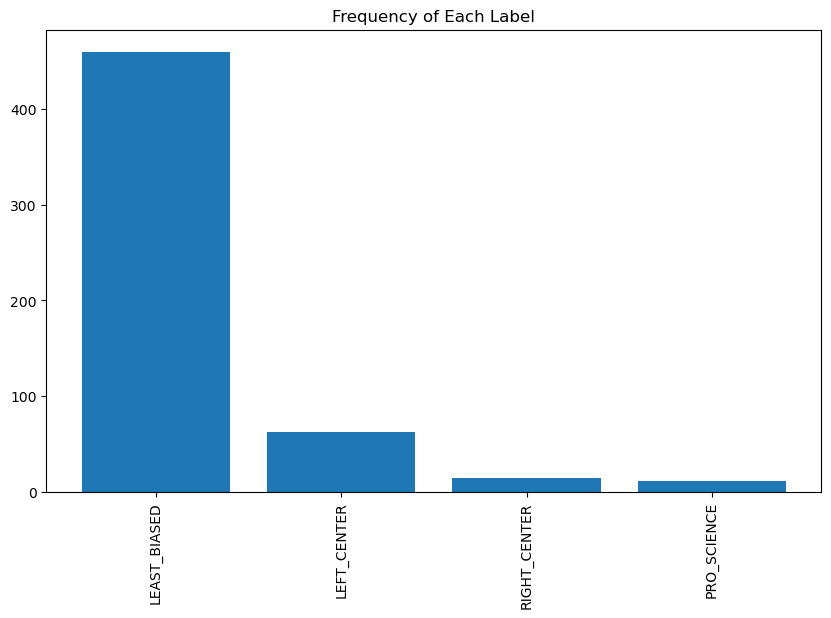

In [60]:
# Calculate the sum of each label column
label_sums = rn_anno_edit.iloc[:, 3:].sum()

# Create a bar plot of the label frequencies
plt.figure(figsize=(10, 6))
plt.bar(label_sums.index, label_sums.values)
plt.xticks(rotation=90)
plt.title('Frequency of Each Label')
plt.show()

In [61]:

label_counts = rn_anno_edit.iloc[:, 3:].sum(axis=1)  # adjust column selection as needed

# Create a parallel categories diagram
fig = px.parallel_categories(rn_anno_edit[rn_anno_edit.columns[3:]], color=label_counts, title="Parallel Sets Diagram")
fig.update_xaxes(tickangle=45)
fig.show()


/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



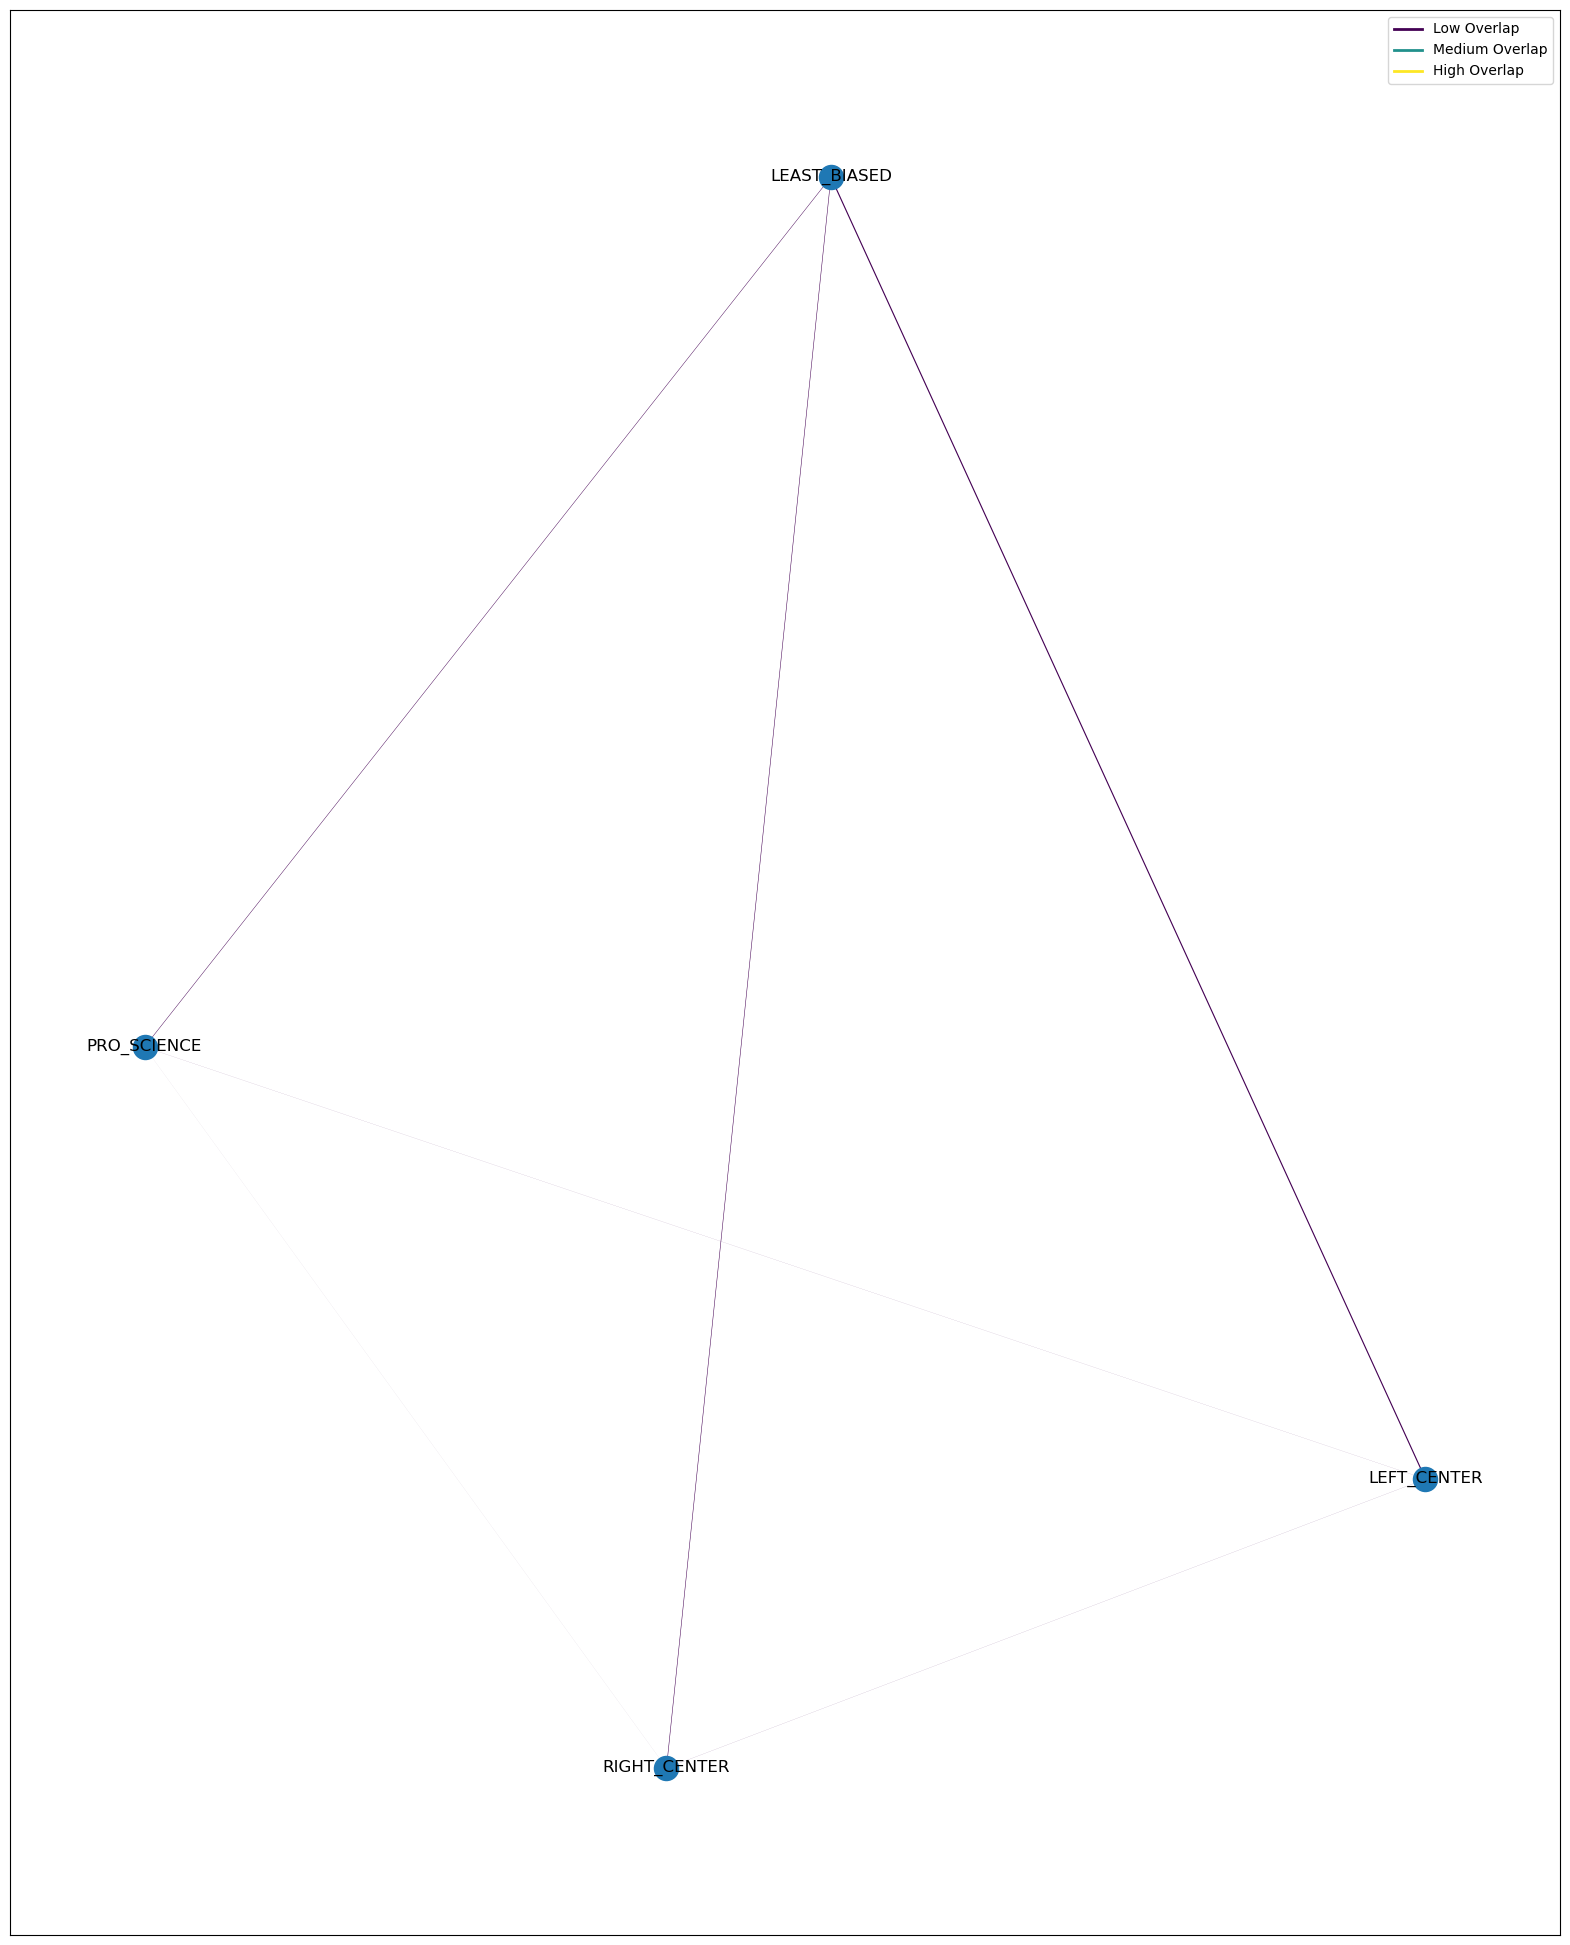

In [62]:

# Step 1: Create a correlation matrix
corr_matrix_rn = rn_anno_edit.iloc[:, 3:].astype(bool).astype(int).corr()  # adjust column selection as needed

# Step 2: Convert the correlation matrix to a NetworkX graph
G = nx.from_pandas_adjacency(corr_matrix_rn)

# Step 3: Remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

# Step 4: Create a color map
edge_weights = [d['weight'] for _, _, d in G.edges(data=True)]
edge_colors = plt.cm.viridis(np.array(edge_weights) / max(edge_weights))

# Step 5: Visualize the network diagram
plt.figure(figsize=(20, 25))
pos = nx.spring_layout(G, seed=42)  # This sets the position of the nodes. Feel free to adjust the layout and seed as needed.

# Draw the nodes
nx.draw_networkx_nodes(G, pos)

# Draw the edges, with width and color proportional to the weight (i.e., the correlation)
for edge in G.edges(data=True):
    idx = list(G.edges()).index(edge[:2])
    nx.draw_networkx_edges(G, pos, edgelist=[edge], 
                           width=edge[2]['weight'], 
                           edge_color=edge_colors[idx])

# Draw the labels
nx.draw_networkx_labels(G, pos)

# Create a custom legend
custom_lines = [Line2D([0], [0], color=plt.cm.viridis(0.), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(.5), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(1.), lw=2)]
plt.legend(custom_lines, ['Low Overlap', 'Medium Overlap', 'High Overlap'])

plt.show()


In [63]:
rn_anno_factual=[]

rn_anno_factual = rn_anno_edit.copy(deep=True)

rn_anno_factual['Factuality'] = rn_anno_factual['Factuality'].apply(lambda x: str(x).split(','))

# Get list of unique categories
categories = set(x.strip() for l in rn_anno_factual['Factuality'] for x in l)

for cat in categories:
    rn_anno_factual[cat] = rn_anno_factual['Factuality'].apply(lambda x: int(cat in x))
    

categories

{'HIGH', 'MIXED', 'MOSTLY_FACTUAL', 'VERY_HIGH'}

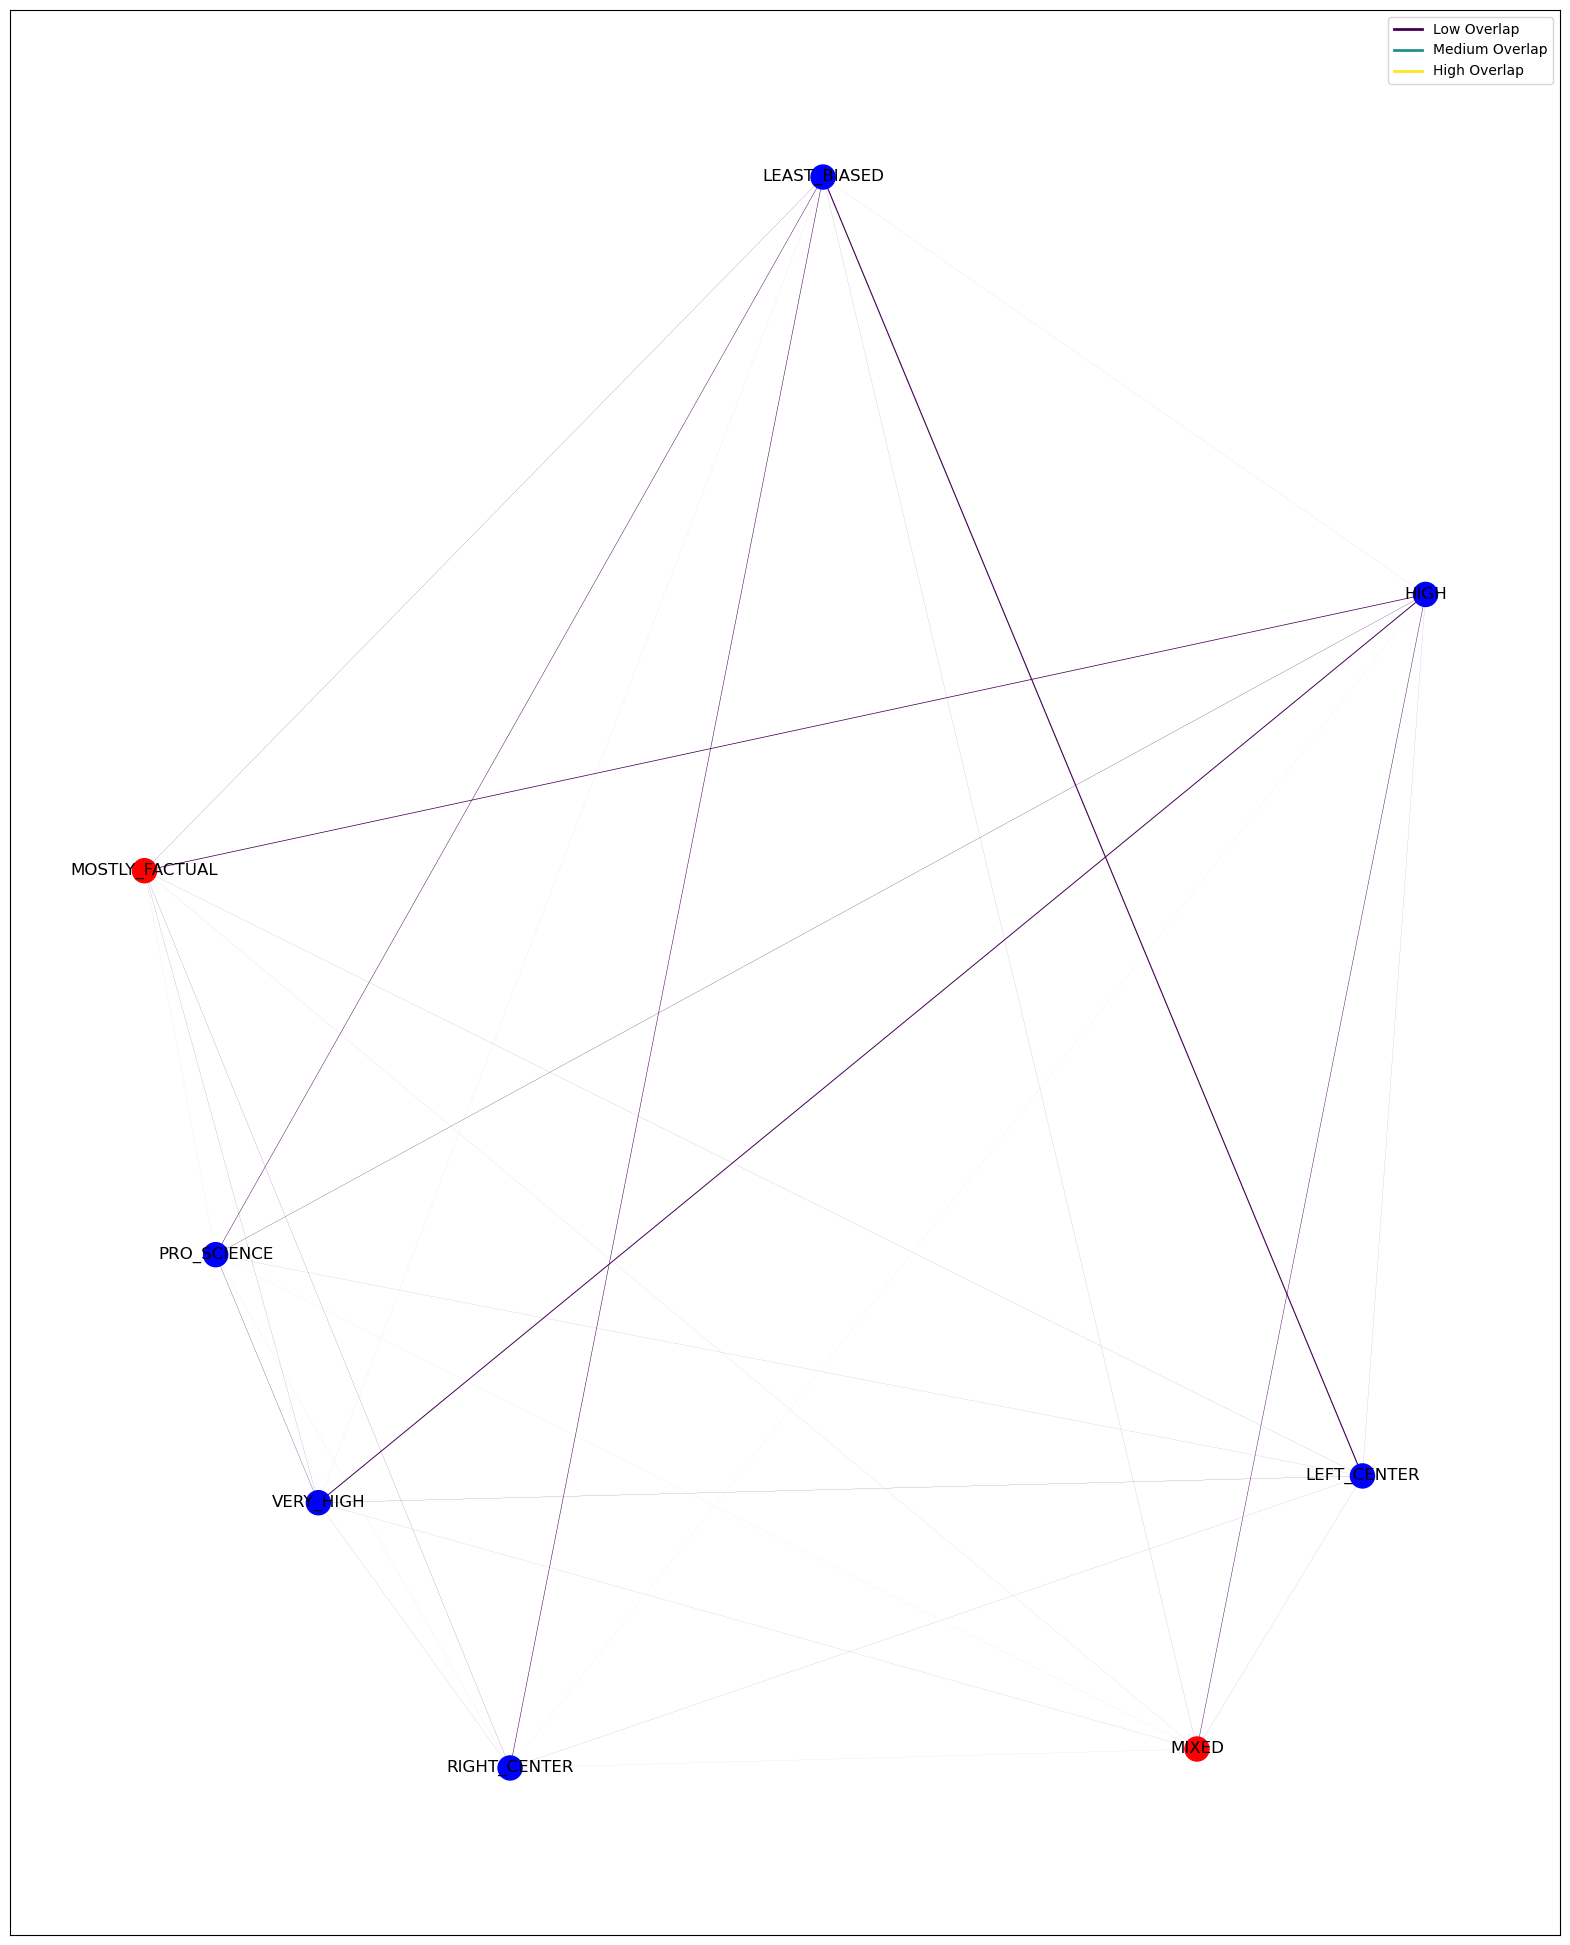

In [64]:

# Step 1: Create a correlation matrix
corr_matrix = rn_anno_factual.iloc[:, 3:].astype(bool).astype(int).corr()  # adjust column selection as needed

# Step 2: Convert the correlation matrix to a NetworkX graph
G = nx.from_pandas_adjacency(corr_matrix)

# Step 3: Remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

# Step 4: Create a color map
edge_weights = [d['weight'] for _, _, d in G.edges(data=True)]
edge_colors = plt.cm.viridis(np.array(edge_weights) / max(edge_weights))

# Step 5: Visualize the network diagram
plt.figure(figsize=(20, 25))
pos = nx.spring_layout(G, seed=42)

# Define node colors
factuality_categories = {'LOW', 'MIXED', 'MOSTLY_FACTUAL', 'VERY_LOW'}
node_colors = ['red' if node in factuality_categories else 'blue' for node in G.nodes()]

# Draw the nodes with specified colors
nx.draw_networkx_nodes(G, pos, node_color=node_colors)

# Draw the edges, with width and color proportional to the weight (i.e., the correlation)
for edge in G.edges(data=True):
    idx = list(G.edges()).index(edge[:2])
    nx.draw_networkx_edges(G, pos, edgelist=[edge], 
                           width=edge[2]['weight'], 
                           edge_color=edge_colors[idx])

# Draw the labels
nx.draw_networkx_labels(G, pos)

# Create a custom legend for edges
custom_lines = [Line2D([0], [0], color=plt.cm.viridis(0.), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(.5), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(1.), lw=2)]
plt.legend(custom_lines, ['Low Overlap', 'Medium Overlap', 'High Overlap'])

# Show the plot
plt.show()


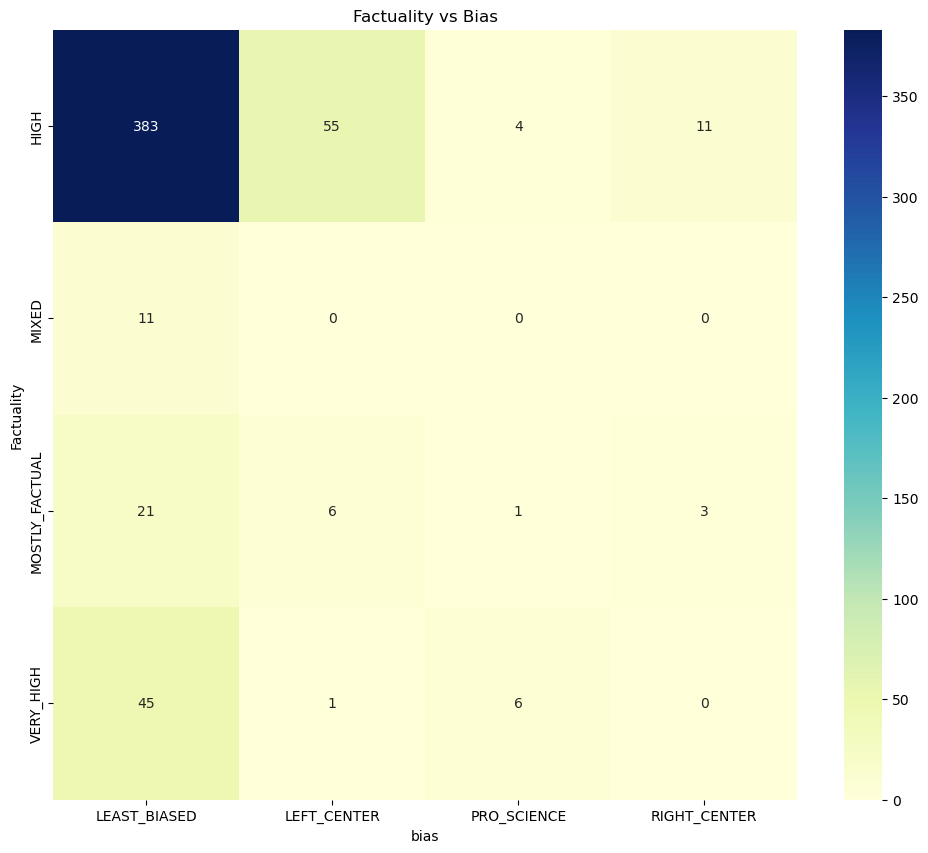

In [65]:

# Define the bias columns
bias_cols = rn_anno_edit.columns[3:]

# Reverse the one-hot encoding
rn_anno_edit['bias'] = rn_anno_edit[bias_cols].idxmax(axis=1)

# Create a crosstab between 'Factuality' and 'Bias'
crosstab = pd.crosstab(rn_anno_edit['Factuality'], rn_anno_edit['bias'])

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Factuality vs Bias")
plt.show()


### Information about annotated False News spreader web sources
fn_anno

In [66]:
fn_anno = pd.read_csv(r'domain_annotations/fn_domains_annotated',sep=';',header=None,names=['Source','Bias','Factuality'])

In [67]:
fn_anno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Source      1577 non-null   object
 1   Bias        1349 non-null   object
 2   Factuality  1461 non-null   object
dtypes: object(3)
memory usage: 37.1+ KB


In [68]:
fn_anno.describe()

,Source,Bias,Factuality
count,1577,1349,1461
unique,1387,13,4
top,skeptiko.com,CONSPIRACY_PSEUDOSCIENCE,LOW
freq,2,429,625


In [69]:
fn_anno.head()

,Source,Bias,Factuality
0,truthfeednews.com,EXTREME_RIGHT,LOW
1,channel28news.com,NaN,VERY_LOW
2,newsbreakers.org,SATIRE,NaN
3,westsgvnews.com,RIGHT_CENTER,MIXED
4,bridgeporttimes.com,RIGHT_CENTER,MIXED


In [70]:
fn_anno.dropna(inplace=True)

In [71]:
fn_anno['Bias'].unique()

array(['EXTREME_RIGHT', 'RIGHT_CENTER', 'CONSPIRACY_PSEUDOSCIENCE',
       'RIGHT', 'EXTREME_LEFT', 'LEFT', 'LEFT_CENTER',
       'CONSPIRACY_PSEUDOSCIENCE, EXTREME_RIGHT',
       'CONSPIRACY_PSEUDOSCIENCE, RIGHT',
       'RIGHT, CONSPIRACY_PSEUDOSCIENCE',
       'EXTREME_RIGHT, CONSPIRACY_PSEUDOSCIENCE',
       'PRO_RUSSIAN_PROPAGANDA, RIGHT'], dtype=object)

In [75]:
fn_anno_edit = fn_anno.copy(deep=True)

In [76]:
fn_anno_edit

,Source,Bias,Factuality
0,truthfeednews.com,EXTREME_RIGHT,LOW
3,westsgvnews.com,RIGHT_CENTER,MIXED
4,bridgeporttimes.com,RIGHT_CENTER,MIXED
5,iowaclimate.org,CONSPIRACY_PSEUDOSCIENCE,LOW
6,understandingthethreat.com,EXTREME_RIGHT,LOW
...,...,...,...
1570,pamelageller.com,EXTREME_RIGHT,LOW
1572,frontpagemag.com,EXTREME_RIGHT,LOW
1573,digifection.com,EXTREME_RIGHT,LOW
1575,nwalabamanews.com,RIGHT_CENTER,MIXED


In [77]:
fn_anno_edit['Bias'] = fn_anno_edit['Bias'].apply(lambda x: str(x).split(','))

# Get list of unique categories
categories = set(x.strip() for l in fn_anno_edit['Bias'] for x in l)

# Create new binary columns for each category
for cat in categories:
    fn_anno_edit[cat] = fn_anno_edit['Bias'].apply(lambda x: int(cat in x))

In [78]:
categories

{'CONSPIRACY_PSEUDOSCIENCE',
 'EXTREME_LEFT',
 'EXTREME_RIGHT',
 'LEFT',
 'LEFT_CENTER',
 'PRO_RUSSIAN_PROPAGANDA',
 'RIGHT',
 'RIGHT_CENTER'}

In [79]:
fn_anno_edit.head()

,Source,Bias,Factuality,RIGHT_CENTER,EXTREME_RIGHT,LEFT,LEFT_CENTER,PRO_RUSSIAN_PROPAGANDA,RIGHT,CONSPIRACY_PSEUDOSCIENCE,EXTREME_LEFT
0,truthfeednews.com,[EXTREME_RIGHT],LOW,0,1,0,0,0,0,0,0
3,westsgvnews.com,[RIGHT_CENTER],MIXED,1,0,0,0,0,0,0,0
4,bridgeporttimes.com,[RIGHT_CENTER],MIXED,1,0,0,0,0,0,0,0
5,iowaclimate.org,[CONSPIRACY_PSEUDOSCIENCE],LOW,0,0,0,0,0,0,1,0
6,understandingthethreat.com,[EXTREME_RIGHT],LOW,0,1,0,0,0,0,0,0


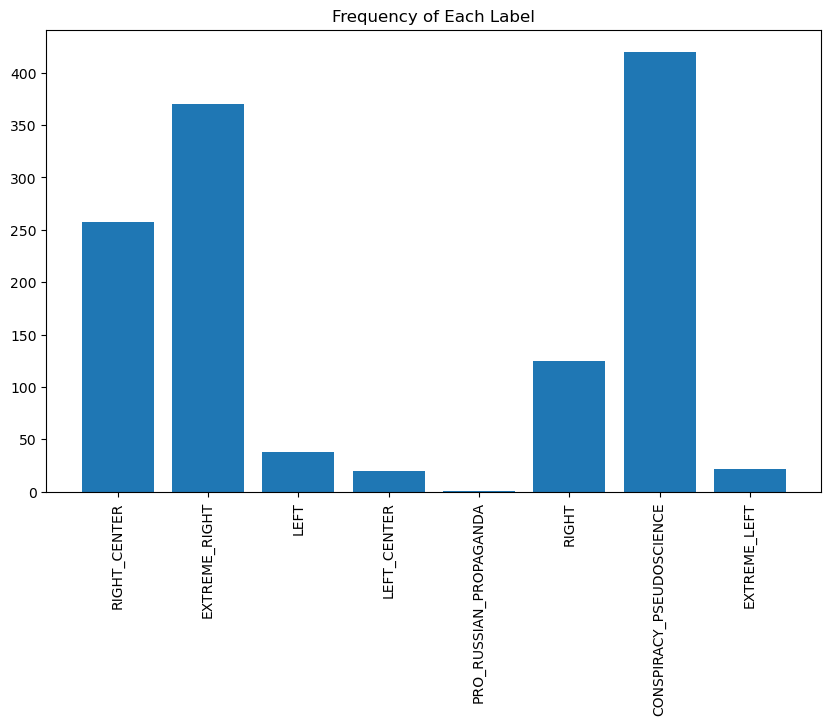

In [80]:

# Calculate the sum of each label column
label_sums = fn_anno_edit.iloc[:, 3:].sum()

# Create a bar plot of the label frequencies
plt.figure(figsize=(10, 6))
plt.bar(label_sums.index, label_sums.values)
plt.xticks(rotation=90)
plt.title('Frequency of Each Label')
plt.show()

In [81]:
fn_anno_edit=fn_anno_edit[['Source', 'Bias', 'Factuality','EXTREME_LEFT', 'LEFT', 'LEFT_CENTER','RIGHT_CENTER',
                           'RIGHT','EXTREME_RIGHT','PRO_RUSSIAN_PROPAGANDA', 'CONSPIRACY_PSEUDOSCIENCE' ]]

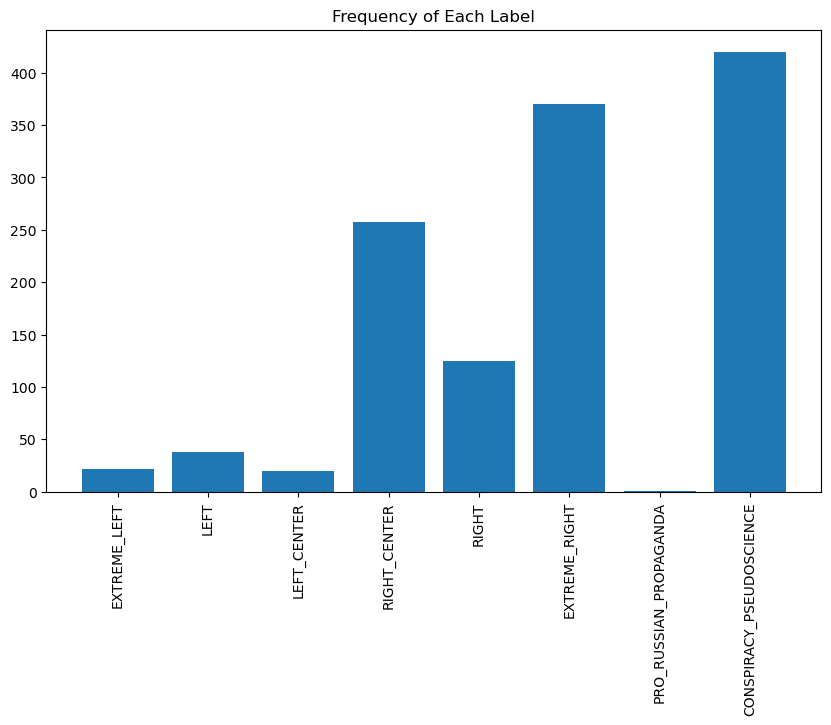

In [82]:

# Calculate the sum of each label column
label_sums = fn_anno_edit.iloc[:, 3:].sum()  # adjust column selection as needed

# Create a bar plot of the label frequencies
plt.figure(figsize=(10, 6))
plt.bar(label_sums.index, label_sums.values)
plt.xticks(rotation=90)
plt.title('Frequency of Each Label')
plt.show()

In [83]:
fn_anno_edit.columns

Index(['Source', 'Bias', 'Factuality', 'EXTREME_LEFT', 'LEFT', 'LEFT_CENTER',
       'RIGHT_CENTER', 'RIGHT', 'EXTREME_RIGHT', 'PRO_RUSSIAN_PROPAGANDA',
       'CONSPIRACY_PSEUDOSCIENCE'],
      dtype='object')

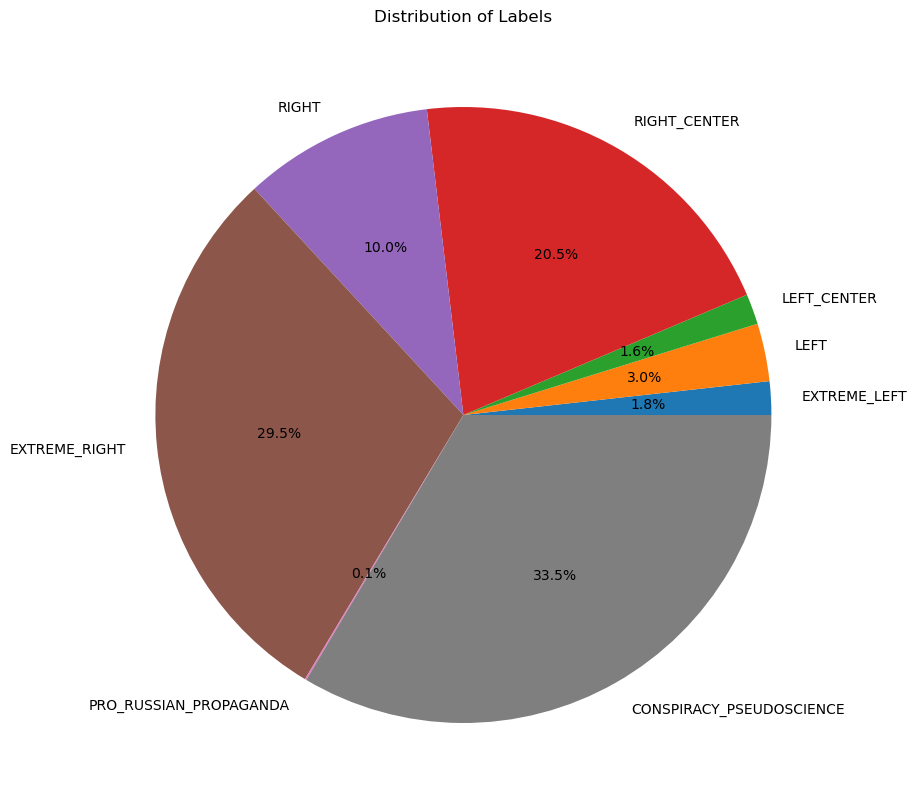

In [84]:
label_counts = fn_anno_edit.iloc[:, 3:].sum()  # adjust column selection as needed
plt.figure(figsize=(10, 10))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()

In [32]:

label_counts = fn_anno_edit.iloc[:, 3:].sum(axis=1)  # adjust column selection as needed

# Create a parallel categories diagram
fig = px.parallel_categories(fn_anno_edit[fn_anno_edit.columns[3:]], color=label_counts, title="Parallel Sets Diagram")
fig.update_xaxes(tickangle=45)
fig.show()


/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



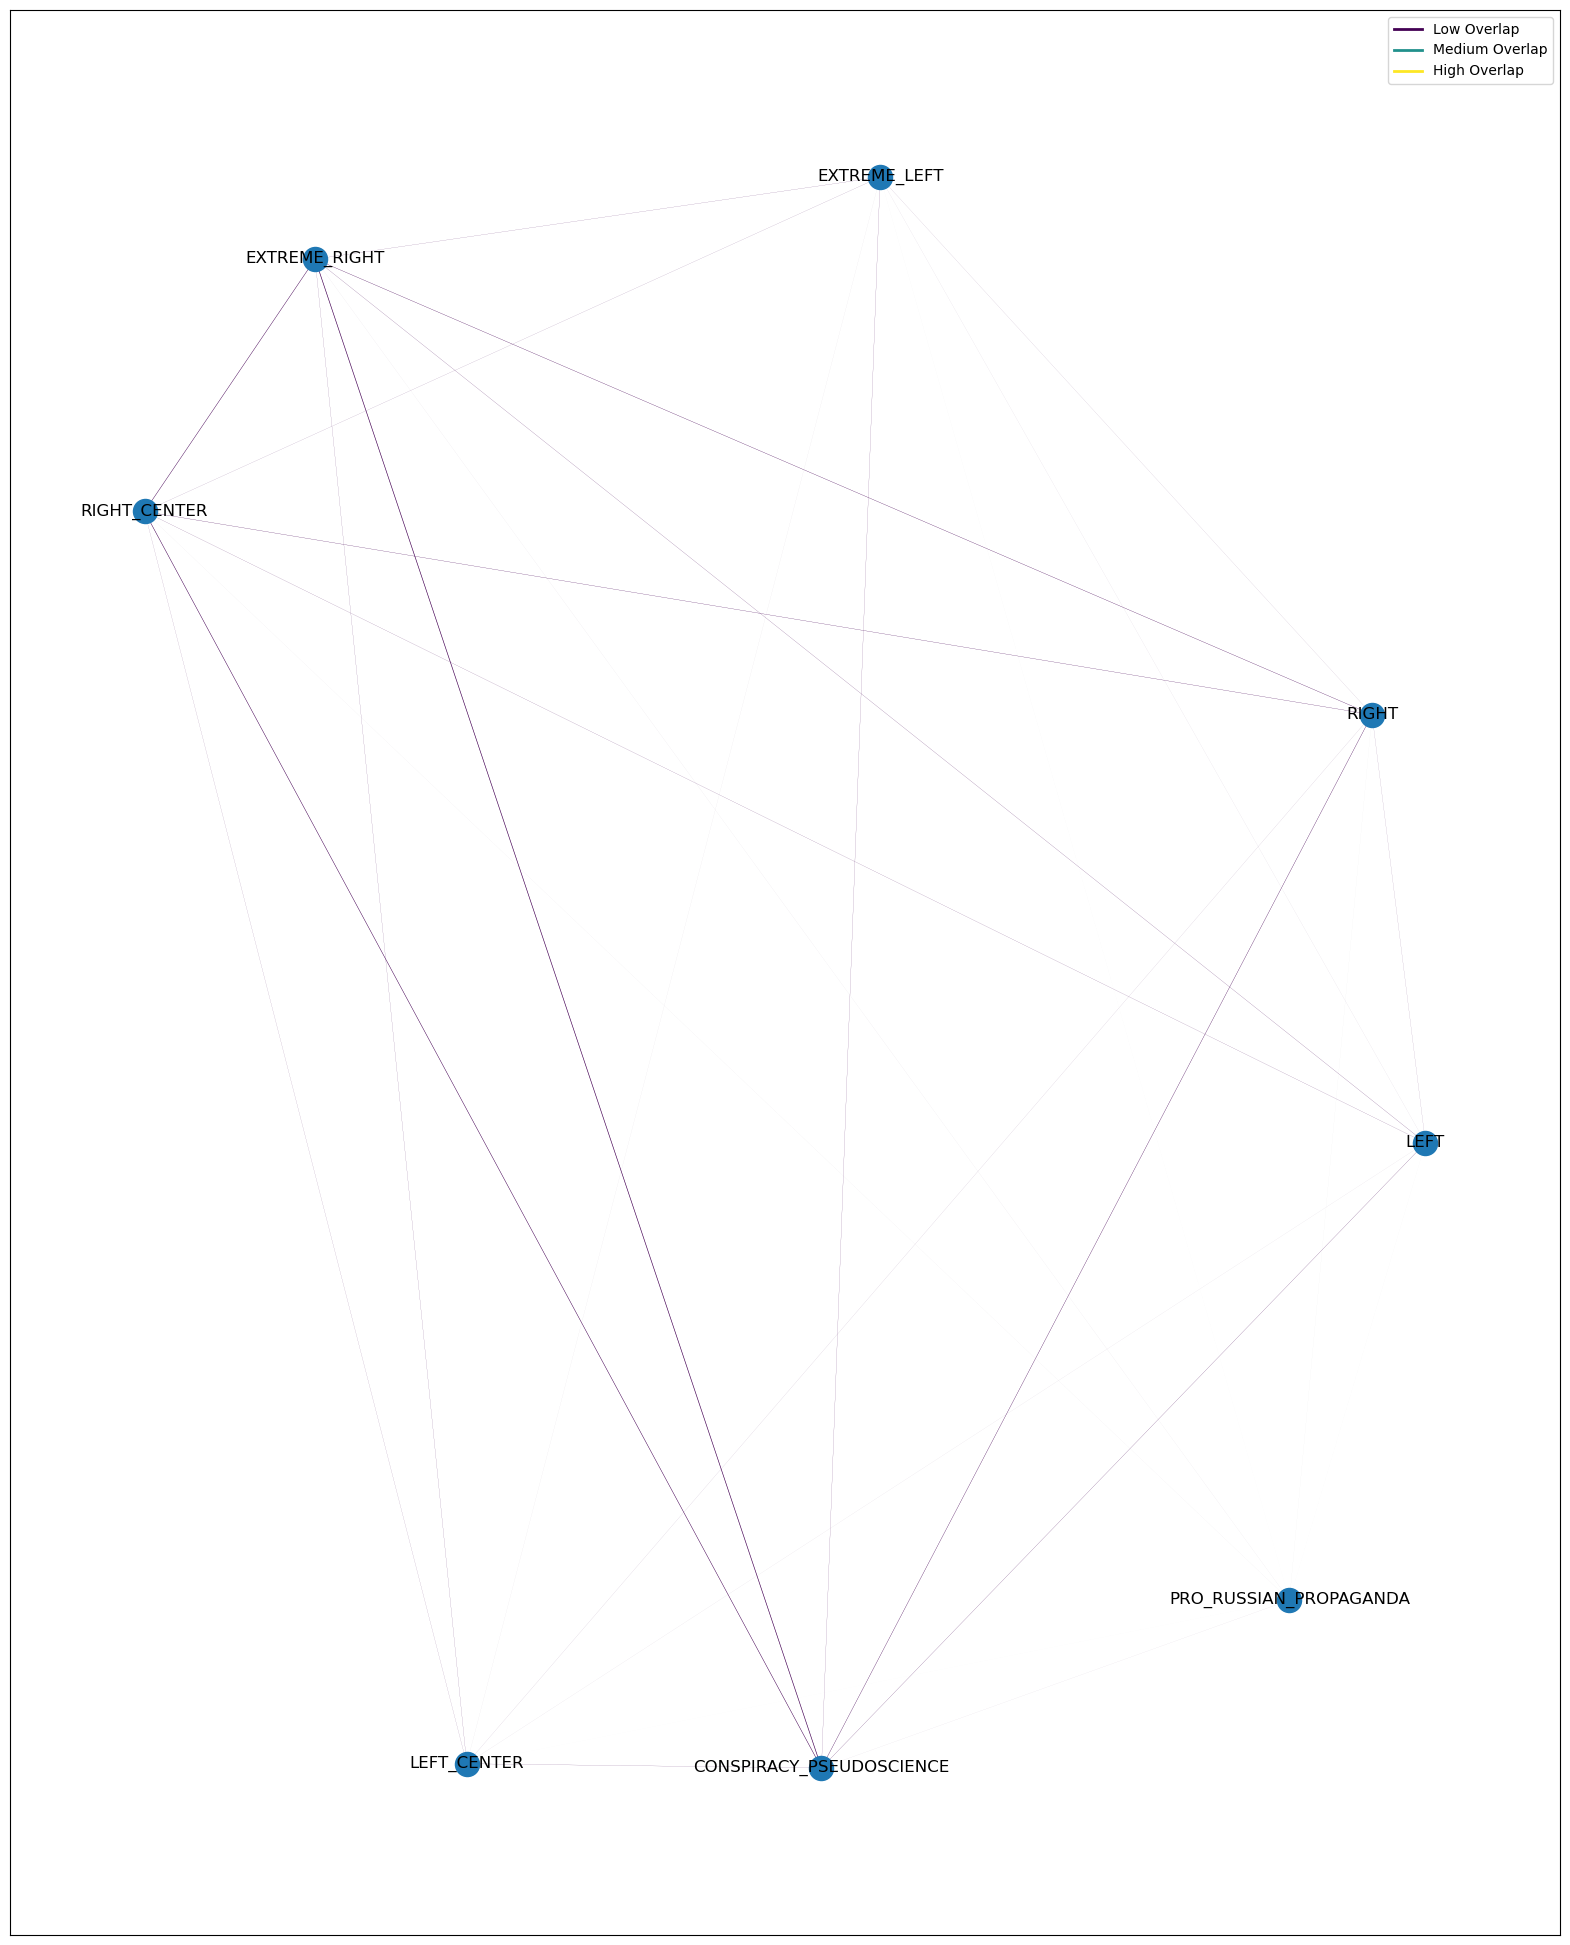

In [86]:


# Step 1: Create a correlation matrix
corr_matrix = fn_anno_edit.iloc[:, 3:].astype(bool).astype(int).corr()  # adjust column selection as needed

# Step 2: Convert the correlation matrix to a NetworkX graph
G = nx.from_pandas_adjacency(corr_matrix)

# Step 3: Remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

# Step 4: Create a color map
edge_weights = [d['weight'] for _, _, d in G.edges(data=True)]
edge_colors = plt.cm.viridis(np.array(edge_weights) / max(edge_weights))

# Step 5: Visualize the network diagram
plt.figure(figsize=(20, 25))
pos = nx.spring_layout(G, seed=42)  # This sets the position of the nodes. Feel free to adjust the layout and seed as needed.

# Draw the nodes
nx.draw_networkx_nodes(G, pos)

# Draw the edges, with width and color proportional to the weight (i.e., the correlation)
for edge in G.edges(data=True):
    idx = list(G.edges()).index(edge[:2])
    nx.draw_networkx_edges(G, pos, edgelist=[edge], 
                           width=edge[2]['weight'], 
                           edge_color=edge_colors[idx])

# Draw the labels
nx.draw_networkx_labels(G, pos)

# Create a custom legend
custom_lines = [Line2D([0], [0], color=plt.cm.viridis(0.), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(.5), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(1.), lw=2)]
plt.legend(custom_lines, ['Low Overlap', 'Medium Overlap', 'High Overlap'])

plt.show()


In [87]:
fn_anno_factual=[]

fn_anno_factual = fn_anno_edit.copy(deep=True)

fn_anno_factual['Factuality'] = fn_anno_factual['Factuality'].apply(lambda x: str(x).split(','))

# Get list of unique categories
categories = set(x.strip() for l in fn_anno_factual['Factuality'] for x in l)

for cat in categories:
    fn_anno_factual[cat] = fn_anno_factual['Factuality'].apply(lambda x: int(cat in x))
    

categories

{'LOW', 'MIXED', 'MOSTLY_FACTUAL', 'VERY_LOW'}

In [88]:
fn_anno_factual.head()

,Source,Bias,Factuality,EXTREME_LEFT,LEFT,LEFT_CENTER,RIGHT_CENTER,RIGHT,EXTREME_RIGHT,PRO_RUSSIAN_PROPAGANDA,CONSPIRACY_PSEUDOSCIENCE,MIXED,LOW,MOSTLY_FACTUAL,VERY_LOW
0,truthfeednews.com,[EXTREME_RIGHT],[LOW],0,0,0,0,0,1,0,0,0,1,0,0
3,westsgvnews.com,[RIGHT_CENTER],[MIXED],0,0,0,1,0,0,0,0,1,0,0,0
4,bridgeporttimes.com,[RIGHT_CENTER],[MIXED],0,0,0,1,0,0,0,0,1,0,0,0
5,iowaclimate.org,[CONSPIRACY_PSEUDOSCIENCE],[LOW],0,0,0,0,0,0,0,1,0,1,0,0
6,understandingthethreat.com,[EXTREME_RIGHT],[LOW],0,0,0,0,0,1,0,0,0,1,0,0


In [89]:
fn_anno_factual.columns

Index(['Source', 'Bias', 'Factuality', 'EXTREME_LEFT', 'LEFT', 'LEFT_CENTER',
       'RIGHT_CENTER', 'RIGHT', 'EXTREME_RIGHT', 'PRO_RUSSIAN_PROPAGANDA',
       'CONSPIRACY_PSEUDOSCIENCE', 'MIXED', 'LOW', 'MOSTLY_FACTUAL',
       'VERY_LOW'],
      dtype='object')

In [90]:
fn_anno_edit.columns

Index(['Source', 'Bias', 'Factuality', 'EXTREME_LEFT', 'LEFT', 'LEFT_CENTER',
       'RIGHT_CENTER', 'RIGHT', 'EXTREME_RIGHT', 'PRO_RUSSIAN_PROPAGANDA',
       'CONSPIRACY_PSEUDOSCIENCE'],
      dtype='object')

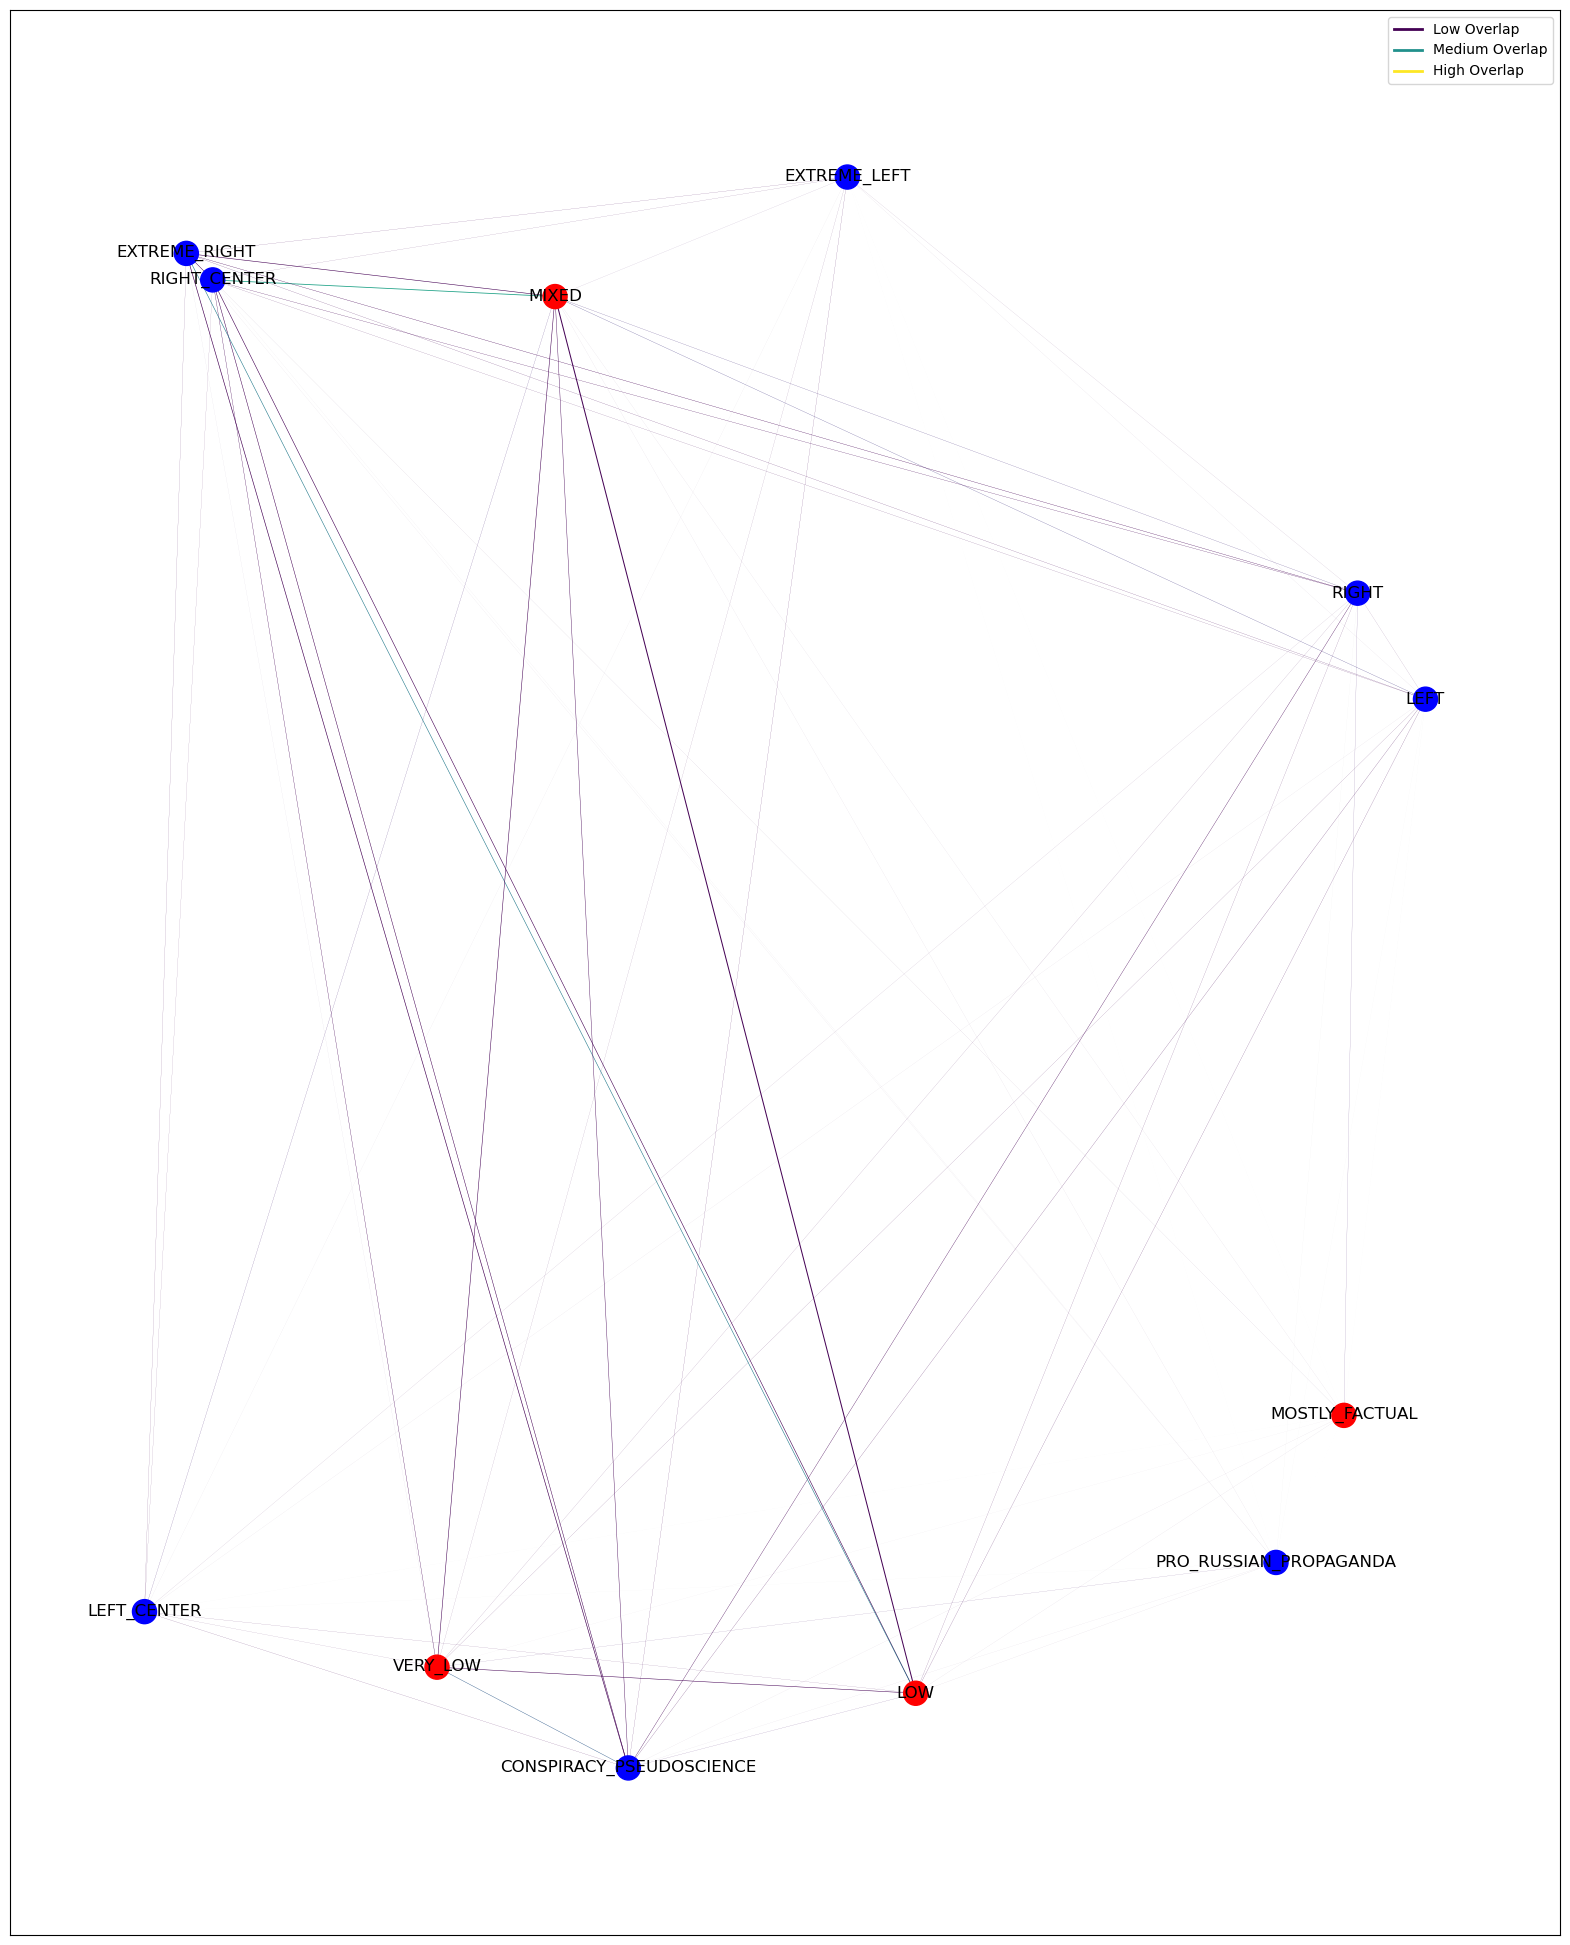

In [91]:

# Step 1: Create a correlation matrix
corr_matrix = fn_anno_factual.iloc[:, 3:].astype(bool).astype(int).corr()  # adjust column selection as needed

# Step 2: Convert the correlation matrix to a NetworkX graph
G = nx.from_pandas_adjacency(corr_matrix)

# Step 3: Remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

# Step 4: Create a color map
edge_weights = [d['weight'] for _, _, d in G.edges(data=True)]
edge_colors = plt.cm.viridis(np.array(edge_weights) / max(edge_weights))

# Step 5: Visualize the network diagram
plt.figure(figsize=(20, 25))
pos = nx.spring_layout(G, seed=42)

# Define node colors
factuality_categories = {'LOW', 'MIXED', 'MOSTLY_FACTUAL', 'VERY_LOW'}
node_colors = ['red' if node in factuality_categories else 'blue' for node in G.nodes()]

# Draw the nodes with specified colors
nx.draw_networkx_nodes(G, pos, node_color=node_colors)

# Draw the edges, with width and color proportional to the weight (i.e., the correlation)
for edge in G.edges(data=True):
    idx = list(G.edges()).index(edge[:2])
    nx.draw_networkx_edges(G, pos, edgelist=[edge], 
                           width=edge[2]['weight'], 
                           edge_color=edge_colors[idx])

# Draw the labels
nx.draw_networkx_labels(G, pos)

# Create a custom legend for edges
custom_lines = [Line2D([0], [0], color=plt.cm.viridis(0.), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(.5), lw=2),
                Line2D([0], [0], color=plt.cm.viridis(1.), lw=2)]
plt.legend(custom_lines, ['Low Overlap', 'Medium Overlap', 'High Overlap'])

# Show the plot
plt.show()


/var/folders/81/kf1vgd6n2k59wdcx0pc5qhqh0000gn/T/ipykernel_4577/1335231955.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



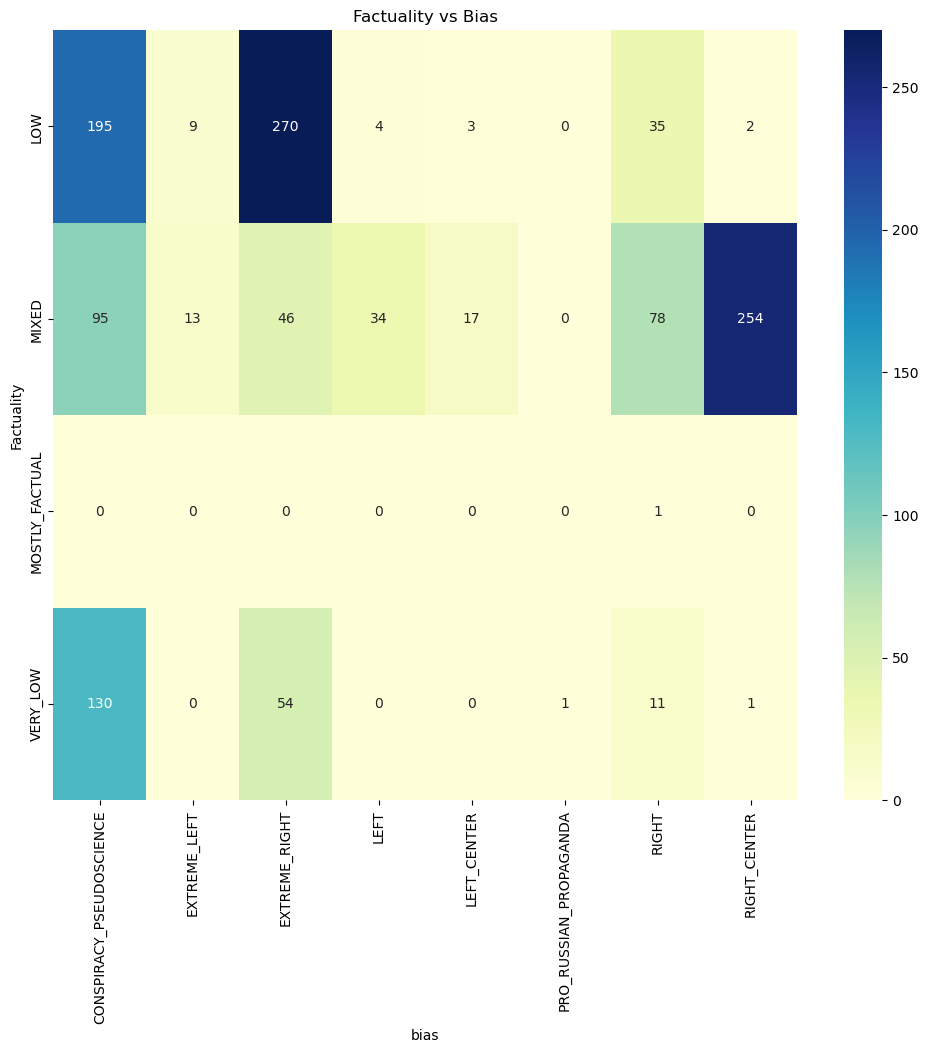

In [92]:


# Define the bias columns
bias_cols = fn_anno_edit.columns[3:]

# Reverse the one-hot encoding
fn_anno_edit['bias'] = fn_anno_edit[bias_cols].idxmax(axis=1)

# Create a crosstab between 'Factuality' and 'Bias'
crosstab = pd.crosstab(fn_anno_edit['Factuality'], fn_anno_edit['bias'])

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Factuality vs Bias")
plt.show()
